In [30]:
import re

import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt


## Concatenate Dataset into one File

In [31]:
from typing import List


def eraseSpace(directory: str):
    files = getFileNameFromDir(direc=directory)
    for file in files:
        realFile = open("{}/{}".format(directory, file), mode="r", encoding="UTF-8")
        data = [f for f in realFile if f.strip()]
        realFile.close()
        realFile = open("{}/{}".format(directory, file), mode="w", encoding="UTF-8")
        realFile.writelines(data)
        realFile.close()


def getFileNameFromDir(direc: str) -> List[str]:
    return [f for f in os.listdir("{}/".format(direc))]


def myConcat(direcToScan: str, outputFilename: str, outputDirec: str = "all_data"):
    files = getFileNameFromDir(direc=direcToScan)

    # datasets = pd.concat([pd.read_csv("{}/{}".format(direcToScan, f), encoding="UTF-8") for f in files], axis=0, ignore_index=True)
    df = []
    for f in files:
        print("direc: {}, file: {}".format(direcToScan, f))
        df.append(pd.read_csv("{}/{}".format(direcToScan, f), encoding="UTF-8"))

    datasets = pd.concat(df, axis=0, ignore_index=True)
    datasets.to_csv("{}/{}.csv".format(outputDirec, outputFilename), index=False)

In [32]:
## Concatenate All Dataset into one File
myConcat(direcToScan="datasets", outputFilename="all_data_dataset")

## Concatenate All Entity-tag Dataset into one File
myConcat(direcToScan="entity-tag", outputFilename="all_entity_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="segments", outputFilename="all_segment_dataset")

## Concatenate All Segmentation Dataset into one File
myConcat(direcToScan="POS/", outputFilename="all_pos_dataset")

direc: datasets, file: AskAboutAcademicFee.csv
direc: datasets, file: AskAboutAge.csv
direc: datasets, file: AskAboutClubInfo.csv
direc: datasets, file: AskAboutCompetition.csv
direc: datasets, file: AskAboutInterest.csv
direc: datasets, file: AskAboutLocation.csv
direc: datasets, file: AskAboutMinistry.csv
direc: datasets, file: AskAboutParkingPrice.csv
direc: datasets, file: AskAboutProvince.csv
direc: datasets, file: AskAboutSchoolMajors.csv
direc: datasets, file: AskWhereHRRoomIs.csv
direc: datasets, file: FindAnnouncementInfo.csv
direc: datasets, file: FindClub.csv
direc: datasets, file: FindClubRoom.csv
direc: datasets, file: FindCSInfo.csv
direc: datasets, file: FindCurrentTime.csv
direc: datasets, file: FindECInfo.csv
direc: datasets, file: FindTNInfo.csv
direc: datasets, file: FindTotalStudents.csv
direc: datasets, file: IsMinistryExist.csv
direc: datasets, file: IsProvinceExist.csv
direc: datasets, file: ListClub.csv
direc: datasets, file: ListParkingSpace.csv
direc: entity-t

## Erase blank from files

In [33]:
try:
    eraseSpace(directory="datasets")
    eraseSpace(directory="entity-tag")
    eraseSpace(directory="POS")
    eraseSpace(directory="segments")
    print("Success")
except:
    print("fail")


Success


## Compare Ner length, POS length, and SEG Length

In [45]:
allEntityDataset = pd.read_csv("all_data/all_entity_dataset.csv")
allPosDataset = pd.read_csv("all_data/all_pos_dataset.csv")
allSegDataset = pd.read_csv("all_data/all_segment_dataset.csv")

# error = [1 for seg, entity, ent, pos in
#          zip(allSegDataset.items(), allEntityDataset["Question"].items(), allPosDataset["Question"].items()) if
#          len(seg) != len(ent) != len(pos)]
myDict = {}
indexs = allEntityDataset.index.tolist()
segs = allSegDataset["Question"].to_list()
tags = allSegDataset["Intent"].to_list()
ents = allEntityDataset["Question"].to_list()
poss = allPosDataset["Question"].to_list()

for seg, tag, ent, pos, index in zip(segs, tags, ents, poss, indexs):
    if len(str(seg).split()) is not len(str(pos).split()) is not len(str(ent).split()):
        myDict.setdefault("index", []).append(index)
        myDict.setdefault("intent", []).append(tag)
        myDict.setdefault("length_seg", []).append(len(str(seg).split()))
        myDict.setdefault("length_pos", []).append(len(str(pos).split()))
        myDict.setdefault("length_ent", []).append(len(str(ent).split()))
        myDict.setdefault("seg", []).append(seg)
        myDict.setdefault("pos", []).append(pos)
        myDict.setdefault("ent", []).append(ent)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [46]:
print("length_seg: ", len(myDict["length_seg"]))
print("length_pos: ", len(myDict["length_pos"]))
print("length_ent: ", len(myDict["length_ent"]))
print("seg: ", len(myDict["seg"]))
print("pos: ", len(myDict["pos"]))
print("ent: ", len(myDict["ent"]))

errorPd = pd.DataFrame.from_dict(myDict)
errorPd.to_csv("all_data/diff_length_sentences.csv")
errorPd

length_seg:  6415
length_pos:  6415
length_ent:  6415
seg:  6415
pos:  6415
ent:  6415


,index,intent,length_seg,length_pos,length_ent,seg,pos,ent
0,78,AskAboutAge,13,14,15,តើ ថូម៉ាស ប្រាប់ បន្ដិច បាន ទេ ថា ឯង មាន ព្រះជ...,តើ/prt ថូម៉ាស/noun ប្រាប់/verb បន្ដិច/adj បាន/...,អាច/verb រៀបរាប់/verb អំពី/adp ព័ត៌មាន/noun រប...
1,79,AskAboutAge,14,15,12,តើ ថូម៉ាស ប្រាប់ បន្ដិច បាន ទេ ថា ឯង មាន ព្រះជ...,តើ/prt ថូម៉ាស/noun ប្រាប់/verb បន្ដិច/adj បាន/...,អាច/verb រៀបរាប់/verb អំពី/adp ព័ត៌មាន/noun រប...
2,82,AskAboutAge,7,8,13,តើ ថូម៉ាស មាន ព្រះជន្ម ប៉ុន្មាន ហេីយ ?,តើ/prt ថូម៉ាស/noun មាន/verb ព្រះ/noun ជន្ម/nou...,អ្នក/pron អាច/verb ប្រាប់/verb អំពី/adp ព័ត៌មា...
3,83,AskAboutAge,8,9,14,តើ ថូម៉ាស មាន ព្រះជន្ម ប៉ុន្មាន ឆ្នាំ ហេីយ ?,តើ/prt ថូម៉ាស/noun មាន/verb ព្រះ/noun ជន្ម/nou...,អ្នក/pron អាច/verb ប្រាប់/verb អំពី/adp ព័ត៌មា...
4,87,AskAboutAge,14,15,14,តើ ថូម៉ាស ប្រាប់ បន្ដិច បាន ទេ ថា អ្នក មាន ព្រ...,តើ/prt ថូម៉ាស/noun ប្រាប់/verb បន្ដិច/adj បាន/...,អាច/verb រៀបរាប់/verb អំពី/adp ព័ត៌មាន/noun រប...
...,...,...,...,...,...,...,...,...
6410,8923,ListClub,1,16,7,NaN,សូម/verb សួរ/verb បន្តិច/adj ថា/conj ក្លិប/nou...,សូម ប្រាប់ ពី កន្លែង ដាក់ ឡាន ?
6411,8924,ListClub,1,17,9,NaN,សូម/verb សួរ/verb បន្តិច/adj ថា/conj ក្លិប/nou...,សូម ប្រាប់ ពី កន្លែង សម្រាប់ ដាក់ ឡាន ម៉ូតូ ?
6412,8925,ListClub,1,10,9,NaN,តើ/prt នៅ/adp សាលា/noun ស៊ីអេឌីធី/noun មាន/ver...,សូម ប្រាប់ ពី កន្លែង សម្រាប់ ដាក់ យាន ជំនិះ ?
6413,8926,ListClub,1,9,8,NaN,តើ/prt នៅ/adp សាលា/noun ស៊ីអេឌីធី/noun មាន/ver...,សូម ប្រាប់ ពី កន្លែង សម្រាប់ ដាក់ ម៉ូតូ ?


## Find Amount of Sentences per intent as well as Total

In [35]:
## Find Amount of Sentences
allDataset = pd.read_csv("all_data/all_data_dataset.csv")
allDataset.head()

,Question,Intent,Questions
0,តើប្រាប់ពីតម្លៃសិក្សារបស់សាលាស៉ីអេឌីធី,AskAboutAcademicFee,NaN
1,តើប្រាប់ពីតម្លៃសិក្សារបស់សាលាCADT,AskAboutAcademicFee,NaN
2,តើខ្ញុំចង់ដឹងពីតម្លៃពីតម្លៃសិក្សារបស់សាលាស៉ីអេ...,AskAboutAcademicFee,NaN
3,តើខ្ញុំចង់ដឹងពីតម្លៃពីតម្លៃសិក្សារបស់សាលាCADT,AskAboutAcademicFee,NaN
4,តើសូមប្រាប់ខ្ញុំពីតម្លៃសិក្សារបស់សាលាស៉ីអេឌីធី,AskAboutAcademicFee,NaN


pal:  [(0.6445469691144432, 0.8528258362168397, 0.6308855568371139), (0.6043983083429451, 0.8318492887351019, 0.6030296039984622), (0.5642496475714469, 0.8108727412533641, 0.5751736511598103), (0.5277508650519032, 0.7918031526336025, 0.5498500576701268), (0.487602204280405, 0.7708266051518646, 0.5219941048314751), (0.44745354350890687, 0.7498500576701269, 0.4941381519928233), (0.4109547609893631, 0.7307804690503652, 0.4688145585031398), (0.370806100217865, 0.7098039215686275, 0.440958605664488), (0.3306574394463668, 0.6888273740868897, 0.41310265282583625), (0.2941586569268231, 0.669757785467128, 0.38777905933615275), (0.2540099961553249, 0.6487812379853902, 0.359923106497501), (0.2156247597078047, 0.6270767653466616, 0.33281045751633986), (0.21439446366782008, 0.5934486735870819, 0.32235294117647056), (0.213041138023837, 0.5564577726515443, 0.31084967320261436), (0.2116878123798539, 0.5194668717160067, 0.29934640522875816), (0.21045751633986928, 0.485838779956427, 0.28888888888888886)

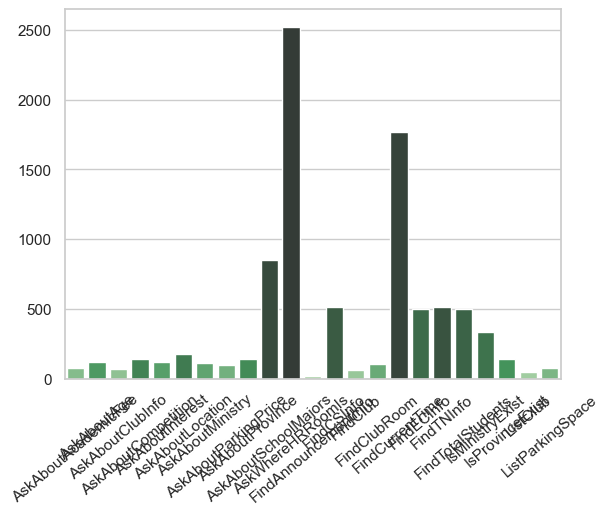

In [36]:
# plt.figure(figsize=(16,8))
sns.set(style="whitegrid",color_codes=True)

dataCount = allDataset.groupby("Intent").size()

pal = sns.color_palette("Greens_d", len(dataCount))

print("pal: ",pal)
rank = dataCount.argsort()
proper = rank.argsort()
aray =np.array(pal)
print(aray)
print("proper ", proper)
print(aray[proper])
ax = sns.barplot(x=dataCount.index.tolist(), y=dataCount.values.tolist(), palette=aray[proper])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.show()

In [37]:
# Find Total
print("Total Sentence length: ", allDataset.Question.count())

Total Sentence length:  8153


## Check amount of entities as well as for any errors

In [38]:
entityDataFrame = pd.read_csv("all_data/all_entity_dataset.csv")
entityFrame = pd.read_csv("Named Entity.csv")

In [39]:
entityFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Named Entity  15 non-null     object
 1   NE Code       15 non-null     object
 2   Remarks       14 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [40]:
# Remove white space from column name and apply it to csv file
# entityFrame = entityFrame.rename(columns={entityFrame.columns.values[1]: "Question"})
# entityFrame.to_csv("Named Entity.csv")

In [41]:
myDict = {}
entityTag = entityFrame["NE Code"].to_list()
entitySentences = entityDataFrame["Question"].to_list()

for x in entityTag:
    count = 0
    for j in entitySentences:
        sentence = j.split()
        for c in range(len(sentence)):
            # Matches /B-Word until space
            if re.search(r"/B-{}\w*".format(x), sentence[c]):
                count += 1
                split = sentence[c].rsplit("/B-", maxsplit=1)[1]
                myDict.update({split: count})

entityAmount = pd.DataFrame(myDict.items(), columns=["Intent", "Amount"])
# entityAmount
myDict

KeyError: 'NE Code'

In [ ]:
## Calculate the percentage

# Sum of Intent
totalIntentTag = sum(myDict[x] for x in myDict)
rise = ["{0:.2f}%".format(myDict[x] * 100 / totalIntentTag) for x in myDict]

# array = np.asarray(rise)
#
# arrayV2 = np.fromiter(("{0:.2f}%".format(myDict[x]*100/totalIntentTag) for x in myDict), dtype=str)

entityAmount["Percentage"] = rise
entityAmount

## Count each word occurence

## Find Different sentence length

In [ ]:
segmentData = pd.read_csv("all_data/all_segment_dataset.csv")
posData = pd.read_csv("all_data/all_pos_dataset.csv")
posData.drop(columns=["Intent"], inplace=True)
posData.rename(columns={"Intents": "Intent"}, inplace=True)

different_length = [1 if len(str(input)) != len(str(output)) else 0 for input, output in
                    zip(segmentData["Question"].tolist(), posData["Question"].tolist())]
print("{} sentences have different length.".format(sum(different_length)))

In [ ]:
mydict = {}
mydict.update({"intent": 1})